## Data Preperation

In [90]:
#import der notwendigen packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date

In [2]:
#einlesen der Daten

station_data = pd.read_csv(r"D:\Benutzer\Jonathan Lanz\Dokumente\Uni\Data Science and Machine Learning\TeamProjektDaten\bluebikes_stations.csv")
data = pd.read_csv(r"D:\Benutzer\Jonathan Lanz\Dokumente\Uni\Data Science and Machine Learning\TeamProjektDaten\bluebikes_idle_time.csv")

In [3]:
#Überblick des Datensatzes

print(len(station_data))
station_data.head(100)

313


,station_id,lat,lon
0,67,42.358100,-71.093198
1,139,42.361780,-71.108100
2,36,42.349792,-71.077338
3,10,42.350406,-71.108279
4,9,42.351187,-71.115852
...,...,...,...
95,150,42.344137,-71.052608
96,173,42.310600,-71.053913
97,5,42.341814,-71.090179
98,151,42.358155,-71.052163


In [4]:
#idletime wird gelöscht und überblick des Datensatzes

data = data.drop(['idle_time'], axis=1)
data.head(100)

,start_time,end_time,start_station_id,end_station_id,bike_id,weekday
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,644,6
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,230,6
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,980,6
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,1834,6
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,230,6
...,...,...,...,...,...,...
95,2017-01-01 11:34:53,2017-01-01 11:37:36,118,100,1866,6
96,2017-01-01 11:35:25,2017-01-01 11:54:19,16,27,1487,6
97,2017-01-01 11:35:34,2017-01-01 11:54:09,16,27,1376,6
98,2017-01-01 11:36:32,2017-01-01 11:55:49,81,163,152,6


In [5]:
#start_time und end_time werden zum typ datetime gecastet.

data['start_time'] = pd.to_datetime(data['start_time'])
data['end_time'] = pd.to_datetime(data['end_time'])

data.dtypes

start_time          datetime64[ns]
end_time            datetime64[ns]
start_station_id             int64
end_station_id               int64
bike_id                      int64
weekday                      int64
dtype: object

## Idle-Time-Berechnung mit den cleanen Daten

In [6]:
#Neue Spalte namens prev_end_time wird erstellt und mit der end-time des vorgängers versehen (Deswegen wird bevor dies passiert erst einmal der Datensatz sortiert).

data.sort_values(['bike_id', 'start_time'], inplace=True)

grouped = data.groupby('bike_id')
data = data.assign(prev_end_time=grouped['end_time'].shift())

data.head(100)

,start_time,end_time,start_station_id,end_station_id,bike_id,weekday,prev_end_time
4354,2017-01-05 16:45:24,2017-01-05 17:01:43,151,16,1,3,NaT
4946,2017-01-06 08:54:23,2017-01-06 09:00:30,16,39,1,4,2017-01-05 17:01:43
4959,2017-01-06 09:07:51,2017-01-06 09:22:12,39,43,1,4,2017-01-06 09:00:30
41443,2017-03-06 18:37:43,2017-03-06 18:40:16,21,46,1,0,2017-01-06 09:22:12
41916,2017-03-07 09:17:09,2017-03-07 09:24:10,46,67,1,1,2017-03-06 18:40:16
...,...,...,...,...,...,...,...
129597,2017-04-19 18:25:56,2017-04-19 18:31:28,68,67,1,2,2017-04-19 16:33:59
129674,2017-04-19 18:39:40,2017-04-19 18:49:12,67,88,1,2,2017-04-19 18:31:28
130499,2017-04-20 07:55:42,2017-04-20 08:06:11,88,84,1,3,2017-04-19 18:49:12
132528,2017-04-20 16:40:46,2017-04-20 16:58:30,84,179,1,3,2017-04-20 08:06:11


In [7]:
#Berechnung der idle_time mithilfe der davor neu angelegten Spalte.

data['idle_time'] = pd.NaT
grouped = data.groupby('bike_id')
for bike_id, group in grouped:
    group['idle_time'] = group['start_time'] - group['prev_end_time']
    data.loc[group.index, 'idle_time'] = group['idle_time']

data = data.drop(['prev_end_time'], axis=1)
data.head(100)

,start_time,end_time,start_station_id,end_station_id,bike_id,weekday,idle_time
4354,2017-01-05 16:45:24,2017-01-05 17:01:43,151,16,1,3,NaT
4946,2017-01-06 08:54:23,2017-01-06 09:00:30,16,39,1,4,0 days 15:52:40
4959,2017-01-06 09:07:51,2017-01-06 09:22:12,39,43,1,4,0 days 00:07:21
41443,2017-03-06 18:37:43,2017-03-06 18:40:16,21,46,1,0,59 days 09:15:31
41916,2017-03-07 09:17:09,2017-03-07 09:24:10,46,67,1,1,0 days 14:36:53
...,...,...,...,...,...,...,...
129597,2017-04-19 18:25:56,2017-04-19 18:31:28,68,67,1,2,0 days 01:51:57
129674,2017-04-19 18:39:40,2017-04-19 18:49:12,67,88,1,2,0 days 00:08:12
130499,2017-04-20 07:55:42,2017-04-20 08:06:11,88,84,1,3,0 days 13:06:30
132528,2017-04-20 16:40:46,2017-04-20 16:58:30,84,179,1,3,0 days 08:34:35


In [8]:
#negative idle_time und damit einhergehende Überschneidungen von verschiedenen Ausleihungen eines Rads werden seperat gespeichert.

negative_idle_time = data[data['idle_time'] < pd.Timedelta(0)]

negative_idle_time.head(100)

,start_time,end_time,start_station_id,end_station_id,bike_id,weekday,idle_time
1175170,2017-11-05 01:16:53,2017-11-05 01:27:34,88,149,4,6,-1 days +23:57:46


In [9]:
#Die gespeicherten negativen idle_times werden aus dem eigentlichen Datensatz gelöscht

data_cleaned = data.drop(negative_idle_time.index)

print(len(data))
print(len(data_cleaned))

3081461
3081460


In [10]:
#data wird geupdatet / Anzahl an Ausleihungen (3.081.460)

data = data_cleaned
number_of_loans = len(data)
number_of_loans

3081460

In [11]:
#idletime wird gelöscht

data = data.drop(['idle_time'], axis=1)
data.head(100)

,start_time,end_time,start_station_id,end_station_id,bike_id,weekday
4354,2017-01-05 16:45:24,2017-01-05 17:01:43,151,16,1,3
4946,2017-01-06 08:54:23,2017-01-06 09:00:30,16,39,1,4
4959,2017-01-06 09:07:51,2017-01-06 09:22:12,39,43,1,4
41443,2017-03-06 18:37:43,2017-03-06 18:40:16,21,46,1,0
41916,2017-03-07 09:17:09,2017-03-07 09:24:10,46,67,1,1
...,...,...,...,...,...,...
129597,2017-04-19 18:25:56,2017-04-19 18:31:28,68,67,1,2
129674,2017-04-19 18:39:40,2017-04-19 18:49:12,67,88,1,2
130499,2017-04-20 07:55:42,2017-04-20 08:06:11,88,84,1,3
132528,2017-04-20 16:40:46,2017-04-20 16:58:30,84,179,1,3


# Relevant insights - Overall System Performance

### Calculating the Loan-Time

In [13]:
#Berechnung der loan_time

data['loan_time'] = pd.NaT
grouped = data.groupby('bike_id')
for bike_id, group in grouped:
    group['loan_time'] = group['end_time'] - group['start_time']
    data.loc[group.index, 'loan_time'] = group['loan_time']

data.head(100)

,start_time,end_time,start_station_id,end_station_id,bike_id,weekday,loan_time
4354,2017-01-05 16:45:24,2017-01-05 17:01:43,151,16,1,3,0 days 00:16:19
4946,2017-01-06 08:54:23,2017-01-06 09:00:30,16,39,1,4,0 days 00:06:07
4959,2017-01-06 09:07:51,2017-01-06 09:22:12,39,43,1,4,0 days 00:14:21
41443,2017-03-06 18:37:43,2017-03-06 18:40:16,21,46,1,0,0 days 00:02:33
41916,2017-03-07 09:17:09,2017-03-07 09:24:10,46,67,1,1,0 days 00:07:01
...,...,...,...,...,...,...,...
129597,2017-04-19 18:25:56,2017-04-19 18:31:28,68,67,1,2,0 days 00:05:32
129674,2017-04-19 18:39:40,2017-04-19 18:49:12,67,88,1,2,0 days 00:09:32
130499,2017-04-20 07:55:42,2017-04-20 08:06:11,88,84,1,3,0 days 00:10:29
132528,2017-04-20 16:40:46,2017-04-20 16:58:30,84,179,1,3,0 days 00:17:44


In [14]:
#loan_time wird zum Typ timedelta umgecastet.

data['loan_time'] = pd.to_timedelta(data['loan_time'])
data.dtypes

start_time           datetime64[ns]
end_time             datetime64[ns]
start_station_id              int64
end_station_id                int64
bike_id                       int64
weekday                       int64
loan_time           timedelta64[ns]
dtype: object

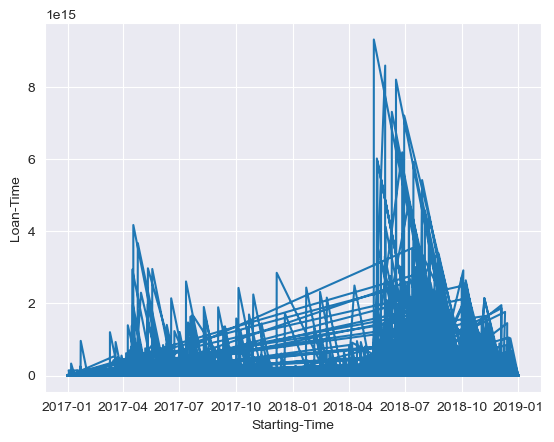

In [22]:
plt.plot(data['start_time'], data['loan_time'])

plt.xlabel('Starting-Time')
plt.ylabel('Loan-Time')

plt.show()

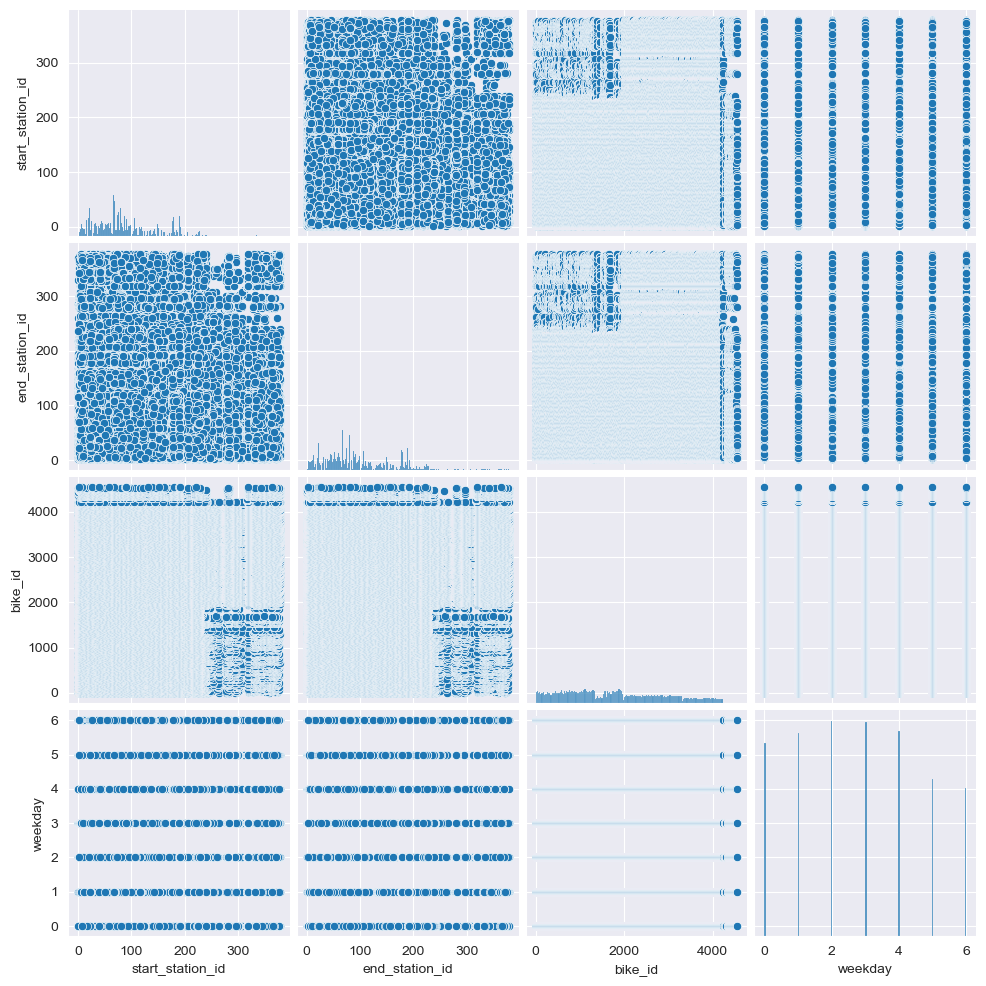

In [21]:
sns.pairplot(data)

In [23]:
#Durchschnittliche Länge der Ausleihzeit ermitteln

average_loan_time = data['loan_time'].mean()
average_loan_time

Timedelta('0 days 00:23:17.623986681')

### Count of Bikes

In [24]:
#anzahl an Fahrrädern

data['bike_id'].nunique()

4211

### Loans per station

In [28]:
#Berechnung der Anzahl der Ausleihen für jede Station

grouped_data = data.groupby(['start_station_id'])
start_station_usage = grouped_data.size().reset_index(name='count')
start_station_usage

,start_station_id,count
0,1,228
1,3,10847
2,4,19370
3,5,16522
4,6,28337
...,...,...
308,373,9
309,374,569
310,376,85
311,377,280


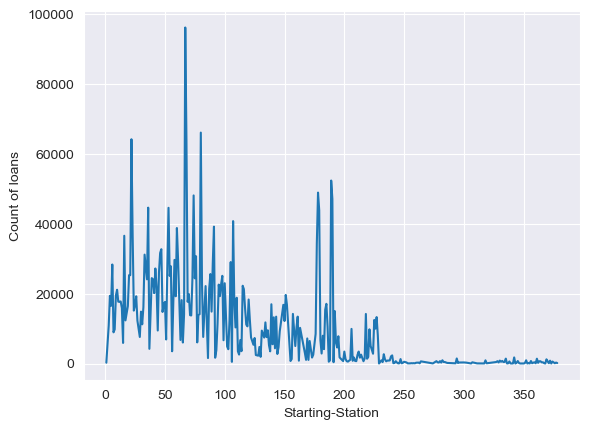

In [77]:
#Plotten der Anzahl der Ausleihen für jede Station

plt.plot(start_station_usage['start_station_id'], start_station_usage['count'])

plt.xlabel('Starting-Station')
plt.ylabel('Count of loans')

plt.show()

In [30]:
#Ermittlung der Top 10 am öftesten genutzten Stationen für Ausleihungen von Fahrrädern

top_10_start_station_usages = start_station_usage['count'].nlargest(10)
top_10_start_station_usages

60     96165
73     66090
19     64188
61     63759
168    52368
157    48919
67     48105
169    47082
31     44610
47     44564
Name: count, dtype: int64

### Returns per station

In [31]:
#Berechnung der Anzahl der Rückgaben für jede Station

grouped_data = data.groupby(['end_station_id'])
end_station_usage = grouped_data.size().reset_index(name='count')
end_station_usage

,end_station_id,count
0,1,968
1,3,10952
2,4,19080
3,5,16814
4,6,28210
...,...,...
308,373,11
309,374,574
310,376,80
311,377,249


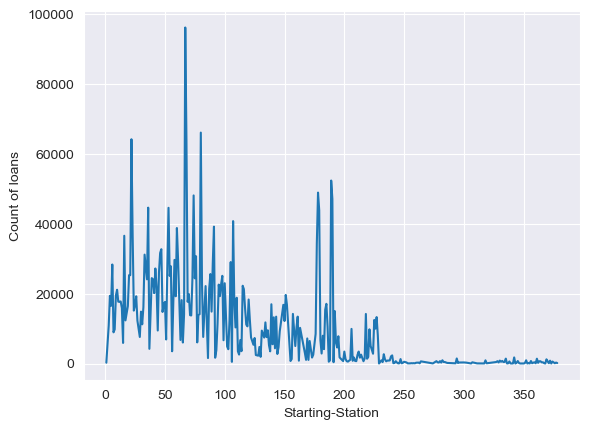

In [32]:
#Plotten der Anzahl der Rückgaben für jede Station

plt.plot(start_station_usage['start_station_id'], start_station_usage['count'])

plt.xlabel('Starting-Station')
plt.ylabel('Count of loans')

plt.show()

In [33]:
#Ermittlung der Top 10 am öftesten genutzten Stationen für Rückgaben von Fahrrädern

top_10_end_station_usages = end_station_usage['count'].nlargest(10)
top_10_end_station_usages

60     92077
73     79886
169    63711
61     63500
19     60875
67     50044
168    49335
31     48588
157    45537
98     42470
Name: count, dtype: int64

### Loans per station per hour

In [34]:
#Berechnung der Anzahl der Ausleihen für jede Station pro Stunde

data['hour'] = data['start_time'].dt.hour
start_station_hourly_usage = data.groupby(['start_station_id', 'hour']).size().reset_index(name='count')
start_station_hourly_usage.sort_values(['count'], inplace=True, ascending=False)
start_station_hourly_usage

,start_station_id,hour,count
1758,80,17,12146
464,22,17,11531
1446,67,17,10464
455,22,8,9675
4022,190,8,9665
...,...,...,...
5927,319,1,1
5909,318,3,1
5908,318,2,1
5905,317,18,1


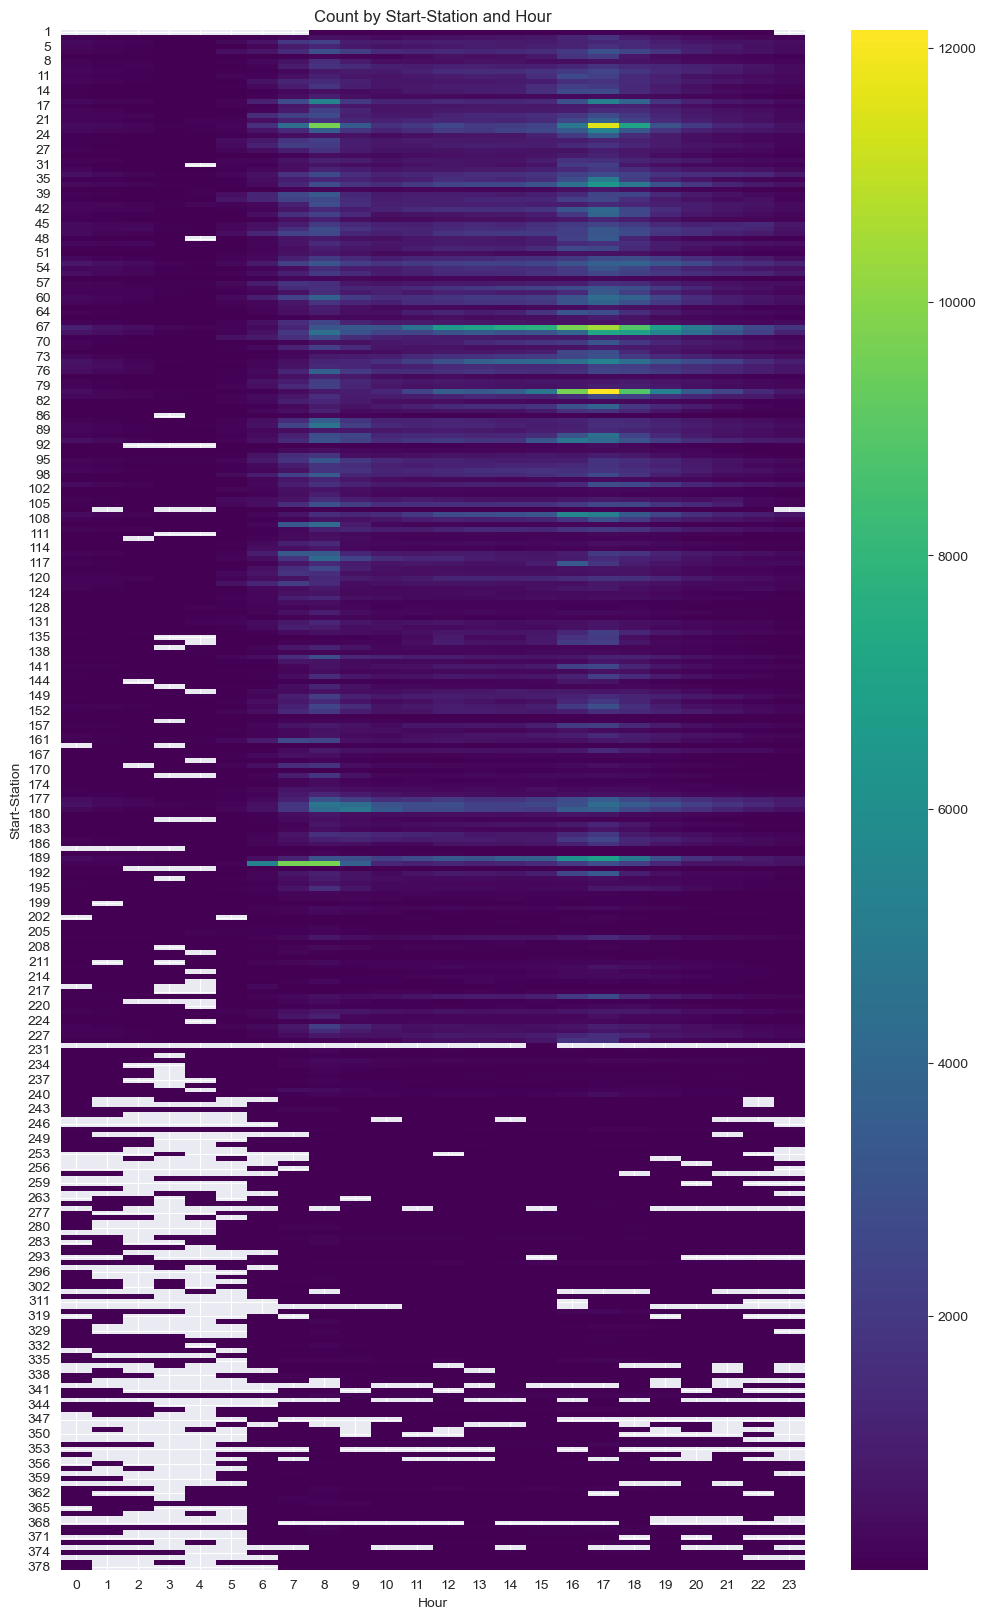

In [99]:
#Erstellen einer Heatmap für die Anzahl der Ausleihen in Abhängigkeit der Station und Stunde

pivot_table = start_station_hourly_usage.pivot_table(index='start_station_id', columns='hour', values='count')

plt.figure(figsize=(12, 20))

sns.heatmap(pivot_table, cmap = 'viridis')

plt.title('Count by Start-Station and Hour')
plt.xlabel('Hour')
plt.ylabel('Start-Station')
plt.show()

In [57]:
#Ermittlung der Top 30 am öftesten genutzten Stationen für Ausleihen von Fahrrädern pro Stunde

top_30_start_station_hourly_usages = start_station_hourly_usage.nlargest(30, 'count')
top_30_start_station_hourly_usages

,start_station_id,hour,count
1758,80,17,12146
464,22,17,11531
1446,67,17,10464
455,22,8,9675
4022,190,8,9665
1445,67,16,9644
1757,80,16,9618
4021,190,7,9617
1447,67,18,8845
1759,80,18,8844


### Returns per station per hour

In [41]:
#Berechnung der Anzahl der Abgaben für jede Station pro Stunde

data['hour'] = data['end_time'].dt.hour
end_station_hourly_usage = data.groupby(['end_station_id', 'hour']).size().reset_index(name='count')
end_station_hourly_usage.sort_values(['count'], inplace=True, ascending=False)
end_station_hourly_usage

,end_station_id,hour,count
4047,190,17,19773
4046,190,16,16760
1755,80,9,15905
1754,80,8,12262
1756,80,10,10860
...,...,...,...
6206,336,21,1
6204,336,19,1
6200,336,15,1
6198,336,13,1


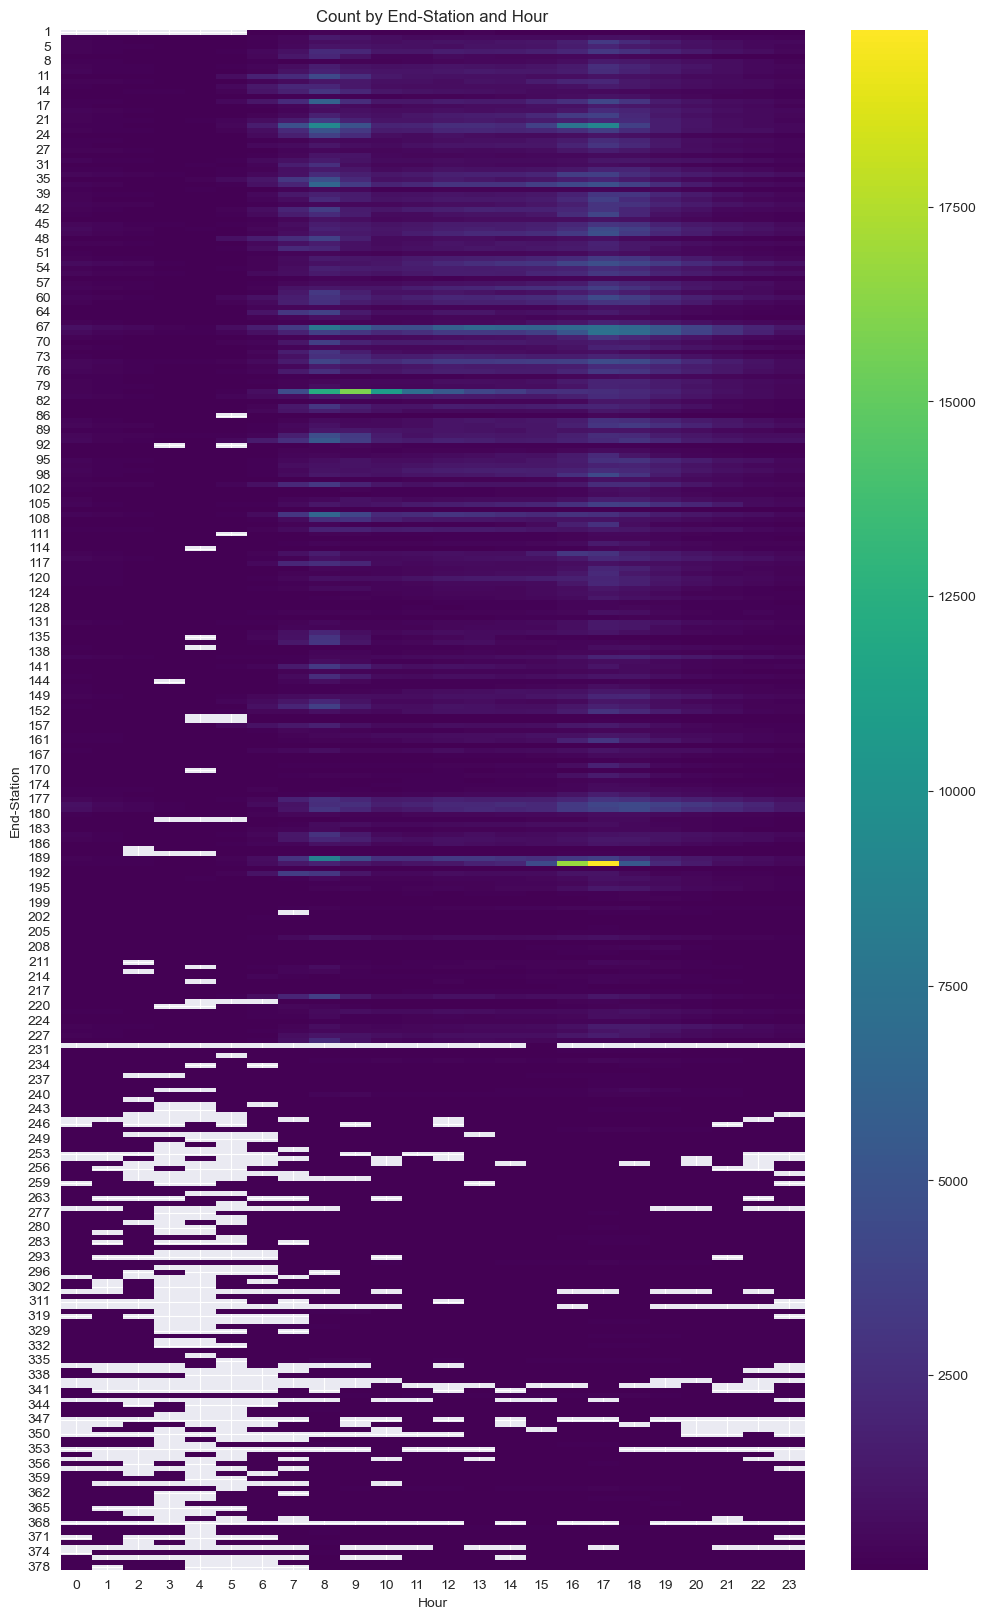

In [98]:
#Erstellen einer Heatmap für die Anzahl der Rückgaben in Abhängigkeit der Station und Stunde

pivot_table = end_station_hourly_usage.pivot_table(index='end_station_id', columns='hour', values='count')

plt.figure(figsize=(12, 20))

sns.heatmap(pivot_table, cmap = 'viridis')

plt.title('Count by End-Station and Hour')
plt.xlabel('Hour')
plt.ylabel('End-Station')
plt.show()

In [58]:
#Ermittlung der Top 30 am öftesten genutzten Stationen für Rückgaben von Fahrrädern pro Stunde

top_30_end_station_hourly_usages = end_station_hourly_usage.nlargest(30, 'count')
top_30_end_station_hourly_usages

,end_station_id,hour,count
4047,190,17,19773
4046,190,16,16760
1755,80,9,15905
1754,80,8,12262
1756,80,10,10860
458,22,8,9296
467,22,17,9082
4014,189,8,8641
1442,67,8,7736
466,22,16,7555


### Loans and returns per hour

In [44]:
#Berechnung der Ausleihen pro Stunde

start_hourly_loans = start_station_hourly_usage.groupby('hour')['count'].sum().reset_index()
start_hourly_loans.sort_values(['count'], inplace=True , ascending=False)
start_hourly_loans

,hour,count
17,17,349988
8,8,292007
16,16,266655
18,18,256006
15,15,183045
19,19,175989
9,9,173864
7,7,168914
12,12,165457
13,13,163903


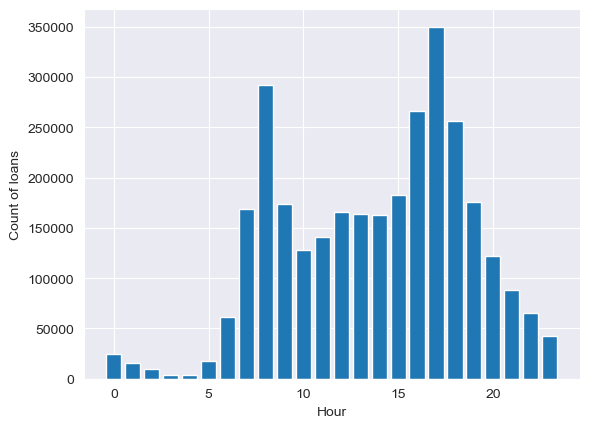

In [46]:
#Plotten der Ausleihen pro Stunde

plt.bar(start_hourly_loans['hour'], start_hourly_loans['count'])

plt.xlabel('Hour')
plt.ylabel('Count of loans')

plt.show()

In [47]:
#Berechnung der Rückgaben pro Stunde

end_hourly_loans = end_station_hourly_usage.groupby('hour')['count'].sum().reset_index()
end_hourly_loans.sort_values(['count'], inplace=True , ascending=False)
end_hourly_loans

,hour,count
17,17,346863
8,8,283815
18,18,279995
16,16,246041
9,9,195276
19,19,194562
15,15,176731
13,13,163444
12,12,160421
14,14,159860


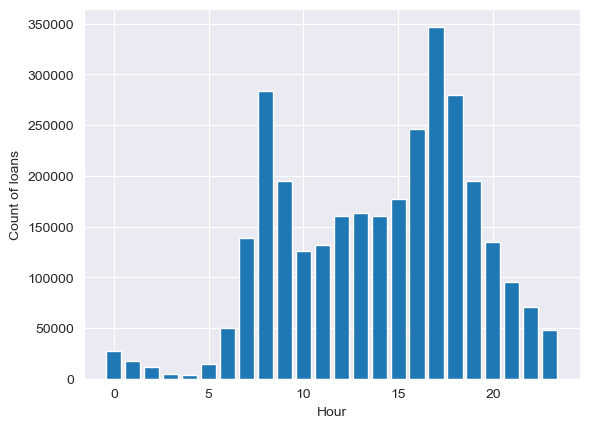

In [52]:
#Plotten der Rückgaben pro Stunde

plt.bar(end_hourly_loans['hour'], end_hourly_loans['count'])

plt.xlabel('Hour')
plt.ylabel('Count of loans')

plt.show()

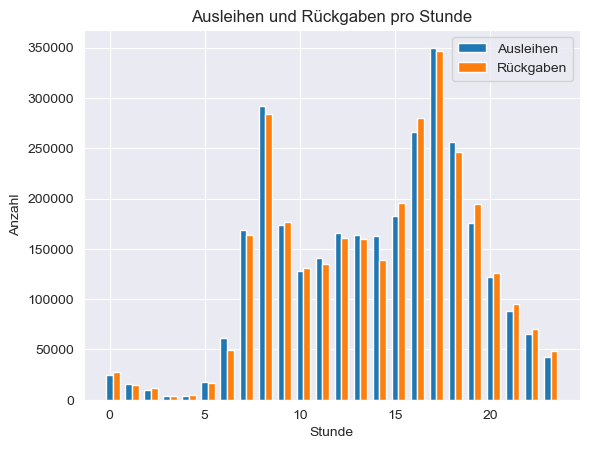

In [54]:
#Plotten der Ausleihen und Rückgaben pro Stunde

bar_width = 0.35

x1 = start_hourly_loans['hour']
x2 = [value + bar_width for value in x1]

plt.bar(x1, start_hourly_loans['count'], width=bar_width, label='Ausleihen')
plt.bar(x2, end_hourly_loans['count'], width=bar_width, label='Rückgaben')

plt.xlabel('Stunde')
plt.ylabel('Anzahl')
plt.title('Ausleihen und Rückgaben pro Stunde')

plt.legend()

plt.show()

### Average loan-time per weekday

In [73]:
#Neuen Datensatz erstellen

weekday_data = pd.DataFrame()
weekday_data['weekday'] = data['weekday']
weekday_data['loan_time'] = data['loan_time']
weekday_data

,weekday,loan_time
4354,3,0 days 00:16:19
4946,4,0 days 00:06:07
4959,4,0 days 00:14:21
41443,0,0 days 00:02:33
41916,1,0 days 00:07:01
...,...,...
3072116,0,0 days 00:08:14
3074137,2,0 days 00:02:08
3077200,4,0 days 00:04:00
3080169,0,0 days 00:06:37


In [74]:
#Durchschnittiche Loan-Time pro Tag berechnen

weekday_avg_loan_time_x = data.groupby('weekday')['loan_time'].mean()

weekday_avg_loan_time = pd.DataFrame({'weekday': weekday_avg_loan_time_x.index, 'avg_loan_time': weekday_avg_loan_time_x.values})

weekday_avg_loan_time

,weekday,avg_loan_time
0,0,0 days 00:19:56.883508852
1,1,0 days 00:20:21.767536995
2,2,0 days 00:21:03.290653791
3,3,0 days 00:19:04.579962159
4,4,0 days 00:22:10.239621291
5,5,0 days 00:34:42.770624193
6,6,0 days 00:30:28.265324412


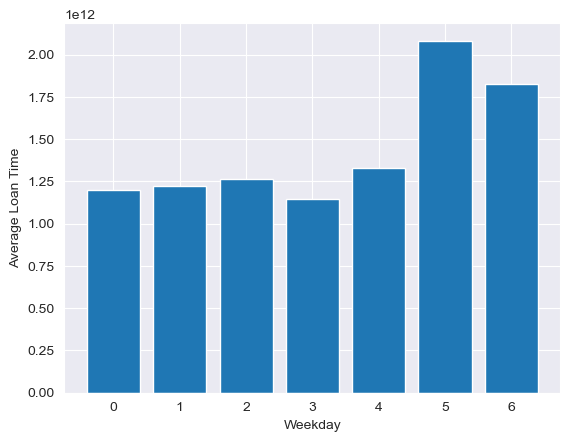

In [75]:
#Plotten der Loan-Time pro Tag

plt.bar(weekday_avg_loan_time['weekday'], weekday_avg_loan_time['avg_loan_time'])

plt.xlabel('Weekday')
plt.ylabel('Average Loan Time')

plt.show()

### Average loan-time per weekday and per hour

In [78]:
#Neuen Datensatz erstellen

weekday_hour_data = pd.DataFrame()
weekday_hour_data['weekday'] = data['weekday']
weekday_hour_data['loan_time'] = data['loan_time']
weekday_hour_data['hour'] = data['hour']
weekday_hour_data

,weekday,loan_time,hour
4354,3,0 days 00:16:19,17
4946,4,0 days 00:06:07,9
4959,4,0 days 00:14:21,9
41443,0,0 days 00:02:33,18
41916,1,0 days 00:07:01,9
...,...,...,...
3072116,0,0 days 00:08:14,8
3074137,2,0 days 00:02:08,13
3077200,4,0 days 00:04:00,17
3080169,0,0 days 00:06:37,9


In [81]:
weekday_hour_avg_loan_time = data.groupby(['weekday', 'hour'])['loan_time'].mean().reset_index()
weekday_hour_avg_loan_time = weekday_hour_avg_loan_time.rename(columns={'loan_time': 'avg_loan_time'})
weekday_hour_avg_loan_time

,weekday,hour,avg_loan_time
0,0,0,0 days 00:22:07.272759475
1,0,1,0 days 00:28:17.776261127
2,0,2,0 days 00:45:56.807916181
3,0,3,0 days 00:48:18.387931034
4,0,4,0 days 00:19:00.774378585
...,...,...,...
163,6,19,0 days 00:27:05.369836918
164,6,20,0 days 00:28:29.670221597
165,6,21,0 days 00:35:57.543532453
166,6,22,0 days 00:21:47.428258911


In [89]:
#Average-Loan-Time in sekunden umwandeln zum plotten

weekday_hour_avg_loan_time['avg_loan_time_seconds'] = weekday_hour_avg_loan_time['avg_loan_time'].dt.total_seconds()
weekday_hour_avg_loan_time

,weekday,hour,avg_loan_time,avg_loan_time_minutes,avg_loan_time_seconds
0,0,0,0 days 00:22:07.272759475,1327.272759,1327.272759
1,0,1,0 days 00:28:17.776261127,1697.776261,1697.776261
2,0,2,0 days 00:45:56.807916181,2756.807916,2756.807916
3,0,3,0 days 00:48:18.387931034,2898.387931,2898.387931
4,0,4,0 days 00:19:00.774378585,1140.774379,1140.774379
...,...,...,...,...,...
163,6,19,0 days 00:27:05.369836918,1625.369837,1625.369837
164,6,20,0 days 00:28:29.670221597,1709.670222,1709.670222
165,6,21,0 days 00:35:57.543532453,2157.543532,2157.543532
166,6,22,0 days 00:21:47.428258911,1307.428259,1307.428259


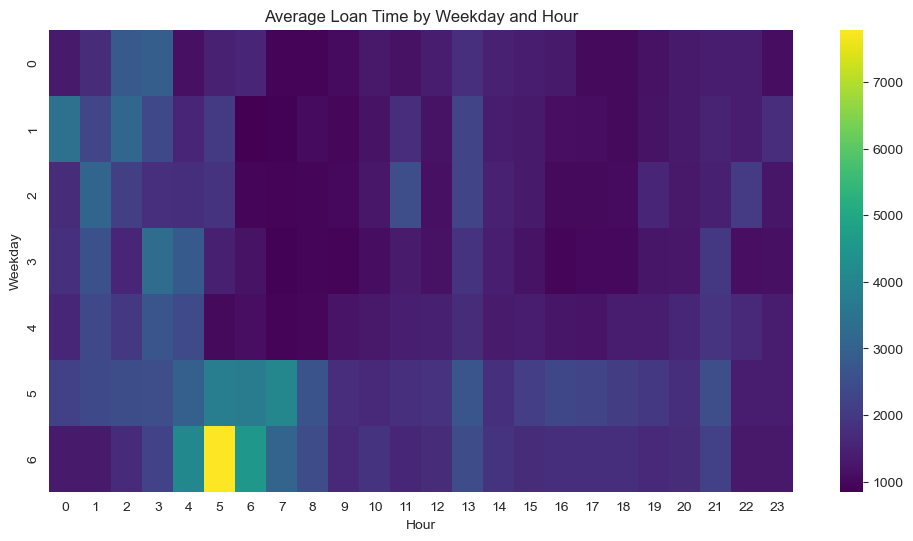

In [88]:
#Erstellen einer Heatmap für die durchschnittliche Loan-Time pro Wochentag und pro Stunde

heatmap_data = weekday_hour_avg_loan_time.pivot(index='weekday', columns='hour', values='avg_loan_time_seconds')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='viridis')

plt.title('Average Loan Time by Weekday and Hour')
plt.xlabel('Hour')
plt.ylabel('Weekday')

plt.show()

### Legal Holidays

In [96]:
#date(year, month, day)
#Neuen Datensatz erstellen

#legal holidays 2017
new_years_day_2017 = date(2017, 1, 1)
mlkjr_day_2017 = date(2017, 1, 16)
presidents_day_2017 = date(2017, 2, 20)
evacuation_day_2017 = date(2017, 3, 17)
patriots_day_2017 = date(2017, 4, 17)
memorial_day_2017 = date(2017, 5, 29)
bunker_hill_day_2017 = date(2017, 6, 17)
independence_day_2017 = date(2017, 7, 4)
labor_day_2017 = date(2017, 9, 4)
columbus_day_2017 = date(2017, 10, 9)
veterans_day_2017 = date(2017, 11, 11)
thanksgiving_day_2017 = date(2017, 11, 23)
christmas_day_2017 = date(2017, 12, 25)

#legal holidays 2018
new_years_day_2018 = date(2018, 1, 1)
mlkjr_day_2018 = date(2018, 1, 15)
presidents_day_2018 = date(2018, 2, 19)
evacuation_day_2018 = date(2018, 3, 17)
patriots_day_2018 = date(2018, 4, 16)
memorial_day_2018 = date(2018, 5, 28)
bunker_hill_day_2018 = date(2018, 6, 17)
independence_day_2018 = date(2018, 7, 4)
labor_day_2018 = date(2018, 9, 3)
columbus_day_2018 = date(2018, 10, 8)
veterans_day_2018 = date(2018, 11, 11)
thanksgiving_day_2018 = date(2018, 11, 22)
christmas_day_2018 = date(2018, 12, 25)

legal_holiday_data = data.loc[data['start_time'].dt.date == new_years_day_2017]
legal_holiday_data = legal_holiday_data.append(data.loc[data['start_time'].dt.date == mlkjr_day_2017])
legal_holiday_data = legal_holiday_data.append(data.loc[data['start_time'].dt.date == presidents_day_2017])
legal_holiday_data = legal_holiday_data.append(data.loc[data['start_time'].dt.date == evacuation_day_2017])
legal_holiday_data = legal_holiday_data.append(data.loc[data['start_time'].dt.date == patriots_day_2017])
legal_holiday_data = legal_holiday_data.append(data.loc[data['start_time'].dt.date == memorial_day_2017])
legal_holiday_data = legal_holiday_data.append(data.loc[data['start_time'].dt.date == bunker_hill_day_2017])
legal_holiday_data = legal_holiday_data.append(data.loc[data['start_time'].dt.date == independence_day_2017])
legal_holiday_data = legal_holiday_data.append(data.loc[data['start_time'].dt.date == labor_day_2017])
legal_holiday_data = legal_holiday_data.append(data.loc[data['start_time'].dt.date == columbus_day_2017])
legal_holiday_data = legal_holiday_data.append(data.loc[data['start_time'].dt.date == veterans_day_2017])
legal_holiday_data = legal_holiday_data.append(data.loc[data['start_time'].dt.date == thanksgiving_day_2017])
legal_holiday_data = legal_holiday_data.append(data.loc[data['start_time'].dt.date == christmas_day_2017])

legal_holiday_data = legal_holiday_data.append(data.loc[data['start_time'].dt.date == new_years_day_2018])
legal_holiday_data = legal_holiday_data.append(data.loc[data['start_time'].dt.date == mlkjr_day_2018])
legal_holiday_data = legal_holiday_data.append(data.loc[data['start_time'].dt.date == presidents_day_2018])
legal_holiday_data = legal_holiday_data.append(data.loc[data['start_time'].dt.date == evacuation_day_2018])
legal_holiday_data = legal_holiday_data.append(data.loc[data['start_time'].dt.date == patriots_day_2018])
legal_holiday_data = legal_holiday_data.append(data.loc[data['start_time'].dt.date == memorial_day_2018])
legal_holiday_data = legal_holiday_data.append(data.loc[data['start_time'].dt.date == bunker_hill_day_2018])
legal_holiday_data = legal_holiday_data.append(data.loc[data['start_time'].dt.date == independence_day_2018])
legal_holiday_data = legal_holiday_data.append(data.loc[data['start_time'].dt.date == labor_day_2018])
legal_holiday_data = legal_holiday_data.append(data.loc[data['start_time'].dt.date == columbus_day_2018])
legal_holiday_data = legal_holiday_data.append(data.loc[data['start_time'].dt.date == veterans_day_2018])
legal_holiday_data = legal_holiday_data.append(data.loc[data['start_time'].dt.date == thanksgiving_day_2018])
legal_holiday_data = legal_holiday_data.append(data.loc[data['start_time'].dt.date == christmas_day_2018])

legal_holiday_data

C:\Users\Jonathan Lanz\AppData\Local\Temp\ipykernel_5672\1632555022.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  legal_holiday_data = legal_holiday_data.append(data.loc[data['start_time'].dt.date == mlkjr_day_2017])
C:\Users\Jonathan Lanz\AppData\Local\Temp\ipykernel_5672\1632555022.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  legal_holiday_data = legal_holiday_data.append(data.loc[data['start_time'].dt.date == presidents_day_2017])
C:\Users\Jonathan Lanz\AppData\Local\Temp\ipykernel_5672\1632555022.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  legal_holiday_data = legal_holiday_data.append(data.loc[data['start_time'].dt.date == evacuation_day_2017])
C:\Users\Jonathan Lanz\AppData\Local\Temp\ipykernel

,start_time,end_time,start_station_id,end_station_id,bike_id,weekday,loan_time,hour
209,2017-01-01 13:39:29,2017-01-01 13:51:14,68,84,13,6,0 days 00:11:45,13
228,2017-01-01 14:07:25,2017-01-01 14:26:52,8,73,20,6,0 days 00:19:27,14
329,2017-01-01 16:32:19,2017-01-01 16:52:05,73,8,20,6,0 days 00:19:46,16
388,2017-01-01 18:12:52,2017-01-01 18:17:30,6,47,26,6,0 days 00:04:38,18
33,2017-01-01 06:11:37,2017-01-01 06:45:54,152,22,34,6,0 days 00:34:17,6
...,...,...,...,...,...,...,...,...
3073048,2018-12-25 08:37:01,2018-12-25 08:53:07,376,189,4527,1,0 days 00:16:06,8
3073485,2018-12-25 18:25:34,2018-12-25 18:33:39,318,178,4530,1,0 days 00:08:05,18
3073416,2018-12-25 16:38:45,2018-12-25 16:43:05,117,189,4534,1,0 days 00:04:20,16
3073032,2018-12-25 07:01:43,2018-12-25 07:06:11,363,81,4536,1,0 days 00:04:28,7


In [97]:
#Durchschnittliche Länge der Ausleihzeit ermitteln

average_loan_time_holidays = legal_holiday_data['loan_time'].mean()
average_loan_time_holidays

Timedelta('0 days 00:34:58.781170671')